# Assignment 4

In [91]:
!pip install tensorflow==2.0.0
!pip install keras==2.3.0

In [92]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, ReLU
import matplotlib.pyplot as plt
keras.__version__

'2.3.0'

In [0]:
import numpy as np

# Caricamento dati

In [0]:
# Dataset predefinito offerto da keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Input (immagini)

In [95]:
print(x_train.shape[0], 'esempi di training')
print(x_test.shape[0], 'esempi di test')

60000 esempi di training
10000 esempi di test


In [96]:
# Dimensione dei dati
x_train.shape

(60000, 28, 28)

Si mostra un immagine del dataset

il valore corrispondete della label è: 5


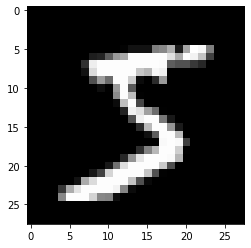

In [97]:
plt.imshow(x_train[0], cmap = "gray")
print("il valore corrispondete della label è: " + str(y_train[0]))

Utilizzando ``keras.dataset.mnist``, abbiamo 60000 immagini 28$\times$28 già caricate in un unico tensore.

Per poterle gestire in un addestramento con keras, dobbiamo inoltre:

1. Aggiungere una dimensione canonica dedicata ai canali (inizialmente non abbiamo canali espliciti perché sono immagini in scala di grigi)
2. Convertire i dati in floating point tra 0 ed 1

In [98]:
# Aggiunta dimensione canali
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train.shape

(60000, 28, 28, 1)

In [0]:
# Conversione di tipo
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

### Output (classi attese)

In [100]:
y_train.shape

(60000,)

In [101]:
# Classe associata al primo esempio
y_train[0]

5

L'addestramento in keras richiede che le classi attese siano passate in forma categorica.

Per un problema di classificazione a singola classe, questo equivale al one-hot encoding:

https://en.wikipedia.org/wiki/One-hot

In [0]:
# Conversione in forma categorica
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [103]:
y_train.shape

(60000, 10)

In [104]:
# Classe associata al primo esempio (in forma categorica)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Definizione ed utilizzo rete neurale

### Modello fully-connected

In [0]:
# Definizione architettura
model = Sequential()
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

https://keras.io/layers/core/
* ``Sequential()`` indica la forma più semplice di modello neurale, senza rami di computazione paralleli
* ``Flatten()`` converte le matrici 2D in vettori monodimensionali
* ``Dense()`` crea un layer fully connected che mappi:<br/>
    dal numero di elementi in input <u>al layer</u> (28 x 28 nel nostro caso, determinato automaticamente)<br/>
    al numero di elementi specificati (10 nel nostro caso, indicato nel primo argomento)
    * ``activation`` specifica la non-linearità da far seguire al layer: https://keras.io/activations/<br/>
        *   La funzione ``softmax`` è utilizzata alla fine dei modelli di classificazione, ed ha due effetti:
            1. Impone che la somma degli elementi sia pari ad 1 per ottenere una distribuzione di probabilità
            2. Distorce le distanze tra i valori, mantenendone la relazione d'ordine
    

In [0]:
# Definizione ottimizzatore
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

https://keras.io/models/model/ > compile
* ``loss`` specifica la funzione d'errore, dal cui calcolo parte il processo di backpropagation<br/>
    https://keras.io/losses/
* ``optimizer`` specifica la tecnica di aggiornamento dei pesi in funzione dei gradienti calcolati<br/>
    https://keras.io/optimizers/
* ``metrics`` specifica delle statistiche aggiuntive da calcolare durante l'addestramento<br/>
    https://keras.io/metrics/

In [107]:
# Addestramento
model.fit(x_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test));

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 1s 20us/step - loss: 0.6378 - accuracy: 0.8440 - val_loss: 0.3631 - val_accuracy: 0.9022


https://keras.io/models/model/ > fit

* ``batch_size`` specifica le dimensioni delle sotto-porzioni di training set da utilizzare ad ogni ciclo di forward/backward
* ``epochs`` specifica quante volte l'intero training set deve essere iterato

In [108]:
# Valutazione
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3630823432922363
Test accuracy: 0.9021999835968018


# Modello convoluzionale a più layer - Assignment

Implementare una rete neurale per la classificazione del dataset MNIST a partire dalle istruzioni viste ad esercitazione.

Seguire la seguente struttura:

* Convoluzione bidimensionale con 32 filtri 3$\times$3
* ReLU
* Max pooling bidimensionale con filtro 2$\times$2
* Flattening
* Fully-connected che mappi a 128 dimensioni
* ReLU
* Fully-connected che mappi alla dimensione finale del problema

### Definizione del modello

In [0]:
img_size = 28
model2 = Sequential()
model2.add(Conv2D(32, (3,3), input_shape=(img_size, img_size, 1)))
model2.add(ReLU())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(ReLU())
model2.add(Dense(10, activation="softmax"))

Summary del modello:

In [129]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
re_lu_13 (ReLU)              (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               692352    
_________________________________________________________________
re_lu_14 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)              

Non essendo stato specificato l'ottimizzatore da utilizzare si utilizza quello applicato anche col modello precedentemente definito (Adadelta).
<br>La loss function rimane "categorical_crossentropy" in quanto il dataset è composto da diverse categorie di immagini

In [0]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Si sceglie di effettuare solo una epoca di training per poter effettuare un confronto tra il modello appena creato e quello implementato in aula (a parità di epoche di training)

In [131]:
history = model2.fit(x_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test));

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 29s 475us/step - loss: 0.2570 - accuracy: 0.9235 - val_loss: 0.0929 - val_accuracy: 0.9722


In [134]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09286945731192828
Test accuracy: 0.9721999764442444


Come è possibile notare la nuova rete neurale "model2" è più efficiente del modello precedente "model" che è stato definito in aula, riesce ad ottenere un valore di Accuracy sul Test Set pari a 97.2%, con valore della Loss pari a 0.092.
<br> Nel modello precedente invece si otteneva un valore di Accuracy pari a 90.2% sul Test Set e un valore di Loss pari a 0.363.